# Programación genética

Este código está basado en los ejemplos de la documentación de la librería "Deap". DEAP es una paquetería para python que nos permite el desarrollo de algoritmos evolutivos y programación genética. Su funcionamiento tiene tres componentes principales:
* <u>**Primitive:**</u> Son las funciones y terminales que se permite usar para la generación de árboles.
* <u>**Toolbox:**</u> Una clase la cual contiene una serie de "herramientas" requeridas para poder aplicar los operadores genéticos a nuestra población. **seleccion, cruza, mutacion, evaluaciones, generación de individuos, etc.**
* Statistics: Clase que nos permite recopilar variables sobre la evaluación y ejecucion de los individuos a lo largo de las generaciones. Como el mejor(Hall of Fame), promedio, fitness, etc.


# Problema de paridad

In [87]:
import random
import operator

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import csv

In [ ]:
# Cargamos la data de entrenamiento
with open('Paridad.csv', 'r') as f:
    reader = csv.reader(f)
    data = [(int(row[0]), int(row[1]), int(row[2]), int(row[3])) for row in reader]


### Definicion del set de nodos terminales y funciones
Creamos nuestro set de variables de terminales y funciones para solucionar el problema de paridad. En cada addPrimitive() se define el operador y la aridad de la función.

In [88]:
pset = gp.PrimitiveSet("Paridad", 3, "var")
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.xor, 2)
pset.addPrimitive(operator.not_, 1)
pset.addTerminal(1)
pset.addTerminal(0)

### Creamos la funcion para fitness y el individuo que se evaluará bajo esa métrica.

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

In [78]:


creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=3, max_=5) # Genera todo el arbol
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr) # Se define el individuo relacionado con la expresion 
toolbox.register("population", tools.initRepeat, list, toolbox.individual) # Se define la poblacion de individuos
toolbox.register("compile", gp.compile, pset=pset) # Se toma un arbol y se compila en funcion  toolbox.compile(expr) compila al individuo

def evalParity(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(x, y, z) == out for (x, y, z, out) in data),

toolbox.register("evaluate", evalParity)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

def main():
    random.seed(21)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, logbook = algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40, stats, halloffame=hof)

    return pop, stats, hof, logbook

if __name__ == "__main__":
    pop, stats, hof, logbook = main()

gen	nevals	avg    	std    	min	max
0  	300   	3.92667	0.74024	0  	6  
1  	171   	4.22   	0.646735	2  	6  
2  	190   	4.35667	0.950152	0  	7  
3  	170   	4.64333	1.03092 	2  	8  
4  	185   	4.96667	1.11604 	2  	8  
5  	181   	5.26333	1.20858 	2  	8  
6  	175   	5.41   	1.34978 	0  	8  
7  	181   	5.54333	1.55824 	0  	8  
8  	174   	5.88   	1.83092 	0  	8  
9  	185   	6.05   	1.91333 	0  	8  
10 	195   	6.14667	1.88463 	0  	8  
11 	188   	6.48333	1.86986 	0  	8  
12 	193   	6.51667	1.89993 	0  	8  
13 	172   	6.74333	1.76374 	3  	8  
14 	169   	6.88667	1.82588 	0  	8  
15 	182   	6.86667	1.76887 	0  	8  
16 	175   	6.77667	1.94082 	0  	8  
17 	178   	6.97667	1.73478 	0  	8  
18 	179   	7.07333	1.64356 	0  	8  
19 	199   	6.83667	1.84842 	0  	8  
20 	180   	7.07   	1.69856 	0  	8  
21 	158   	7.17667	1.52931 	4  	8  
22 	179   	7.14667	1.72776 	0  	8  
23 	178   	7.24   	1.55426 	0  	8  
24 	180   	7.14   	1.57069 	2  	8  
25 	183   	6.98667	1.70093 	0  	8  
26 	171   	7.19667	1.58261 	0 

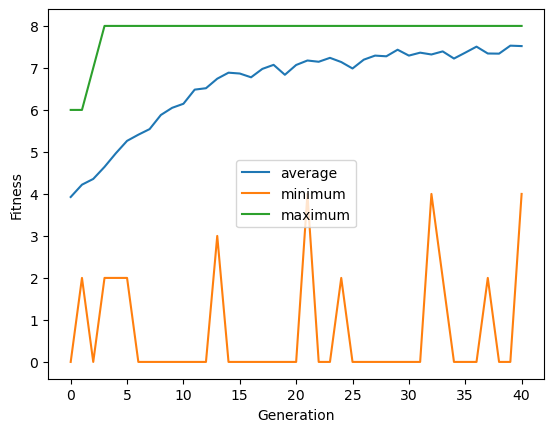

In [79]:
# graph fitness over generations
import matplotlib.pyplot as plt
gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()

In [19]:
# print the best individual
print(hof[0])

xor(not_(and_(1, var1)), xor(or_(var0, and_(0, 1)), xor(0, var2)))


In [20]:
# print the best individual's fitness
print(hof[0].fitness)

(8.0,)


# Regresion simbólica

In [83]:
import csv
with open('Reg_Simbolica.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
    data = data[1:]
    data = [(int(x), int(fx)) for x, fx in data]
    

In [84]:
import operator
import math
import random

import numpy

from functools import partial

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand101", partial(random.randint, -1, 1))
pset.renameArguments(ARG0='x')

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression
    # and the real function
    sqerrors = ((func(x) - y)**2 for x, y in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=data)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

def main():
    random.seed(318)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)

    


    pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 400, stats=mstats,
                                   halloffame=hof, verbose=True)
    # print log
    return pop, log, hof


pop, log, hof = main()

/Users/alex/miniforge3/envs/m_evolutivo/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/alex/miniforge3/envs/m_evolutivo/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max   	min    	nevals	std    	avg    	gen	max	min	nevals	std    
0  	300   	2045.19	0  	192366	1287.05	300   	11011.3	3.54667	0  	7  	2  	300   	1.49482
1  	154   	1392.28	1  	4636.38	1287.05	154   	360.662	3.77   	1  	11 	1  	154   	1.81763
2  	156   	1356   	2  	4636.38	1287.05	156   	230.225	3.85   	2  	11 	1  	156   	1.67755
3  	174   	1342.32	3  	4724.24	1287.05	174   	198.369	4.04667	3  	13 	1  	174   	1.87736
4  	159   	1320.47	4  	1441.52	1270.2 	159   	29.9256	4.30667	4  	13 	1  	159   	2.05409
5  	184   	1317.97	5  	2382.43	1255.48	184   	68.6787	4.64667	5  	13 	1  	184   	2.16991
6  	179   	1318.02	6  	4648.38	1255.48	179   	194.965	4.76   	6  	14 	1  	179   	2.06294
7  	168   	1302.94	7  	1531.05	1243.48	168   	31.7733	4.91667	7  	14 	1  	16

In [85]:
print(hof[0])

add(add(x, add(mul(add(mul(sub(cos(mul(x, add(add(protectedDiv(sub(-1, x), x), x), sub(cos(x), -1)))), -1), add(protectedDiv(cos(mul(mul(-1, 0), sin(1))), x), sub(cos(mul(x, add(protectedDiv(sub(-1, x), x), sub(cos(cos(0)), -1)))), -1))), sub(add(protectedDiv(sub(0, x), x), sub(cos(-1), -1)), -1)), add(protectedDiv(sub(0, add(protectedDiv(1, x), add(protectedDiv(cos(mul(x, add(add(protectedDiv(sub(-1, x), x), x), sub(mul(cos(x), cos(x)), -1)))), x), sub(protectedDiv(sub(cos(x), sub(sub(x, x), sin(cos(x)))), x), -1)))), x), sub(cos(-1), -1))), add(protectedDiv(sub(add(protectedDiv(1, x), sub(add(add(protectedDiv(sub(cos(x), x), x), sub(cos(x), -1)), add(mul(sub(mul(sin(x), sub(-1, x)), -1), add(cos(add(sub(mul(sin(x), sub(0, x)), -1), sub(cos(x), 0))), sub(cos(x), -1))), add(mul(add(mul(sub(cos(0), -1), add(protectedDiv(sub(-1, x), x), sub(cos(x), -1))), 1), add(protectedDiv(sub(1, x), x), sub(cos(-1), sub(0, sin(cos(x)))))), 1))), sin(cos(0)))), -1), 1), sub(add(add(protectedDiv(mul(ad

In [86]:
# Evaluamos al mejor individuo y lo comparamos con los datos 
func = toolbox.compile(expr=hof[0])
for x, fx in data:
    # print x fx and func(x) rounded to 2 decimal places
    print(x, fx, round(func(x), 2))
    
    

-10 -7 -10.39
-9 10 9.28
-8 4 4.96
-7 -10 -11.64
-6 40 39.63
-5 69 69.82
-4 -13 -11.63
-3 0 0.38
-2 1 0.62
-1 6 5.89
0 100 99.73
1 7 6.02
2 2 1.11
3 8 7.72
4 -3 -2.32
5 96 94.02
6 42 45.06
7 0 -0.91
8 10 11.26
9 21 22.12
10 1 2.95


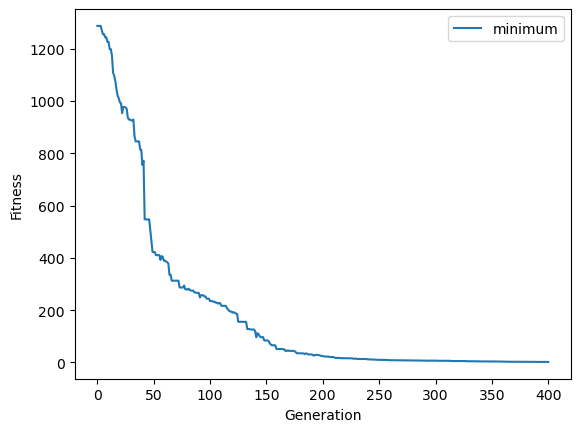

In [68]:
import matplotlib.pyplot as plt

# Extract statistics from logbook
gen = log.select("gen")
# fit_avg = log.chapters["fitness"].select("avg")
fit_min = log.chapters["fitness"].select("min")


# Plot average fitness
# plt.plot(gen, fit_avg, label="average")

# Plot minimum fitness
plt.plot(gen, fit_min, label="minimum")



# Add labels and legend
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

# Show the plot
plt.show()

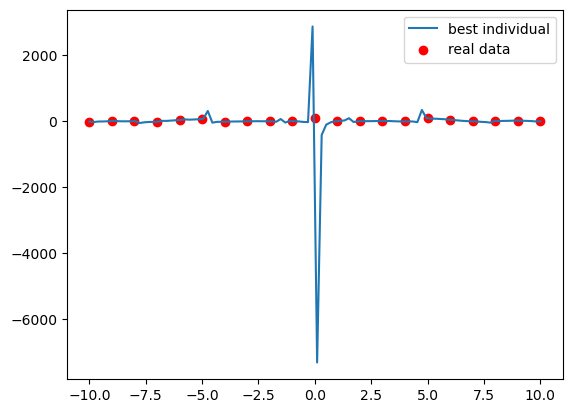

In [69]:
# plot best individual with values from -10 to 10 an plot the points of the real data
import numpy as np
x = np.linspace(-10, 10, 100)
y = [func(x_) for x_ in x]
plt.plot(x, y, label="best individual")
x, y = zip(*data)
plt.scatter(x, y, label="real data", color="red")
plt.legend()
plt.show()


In [76]:
data

[(0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 1.0, 0.0),
 (0.0, 1.0, 0.0, 0.0),
 (0.0, 1.0, 1.0, 1.0),
 (1.0, 0.0, 0.0, 0.0),
 (1.0, 0.0, 1.0, 1.0),
 (1.0, 1.0, 0.0, 1.0),
 (1.0, 1.0, 1.0, 0.0)]